# Exercise 3 - CNN with Keras on CIFAR10

## Loading the packages

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# ... import here the different keras libraries you need
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils

%matplotlib inline

## Loading the raw data

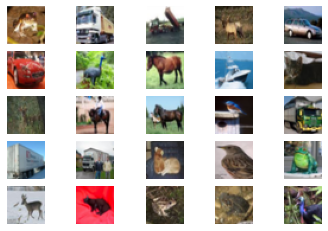

In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k])
            k = k+1
            plt.axis('off')
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

show_imgs(X_train)

In [4]:
print("X-training: ", X_train.shape)
print("y-training: ", y_train.shape)
print("X-test: ", X_test.shape)
print("y-test: ", y_test.shape)

X-training:  (50000, 32, 32, 3)
y-training:  (50000, 1)
X-test:  (10000, 32, 32, 3)
y-test:  (10000, 1)


In [5]:
# Don't reshape
#X_train =  X_train.reshape(50000, 32*32*3)  #change the shape towards (50000, 32*32*3)
#X_test =  X_test.reshape(10000, 32*32*3)    #idem (10000, 32*32*3)
X_train =  X_train.astype('float32')        #change the type towards float32
X_test = X_test.astype('float32')           #idem
X_train /= 255.0                            #normalize the range to be between 0.0 and 1.0
X_test /= 255.0                             #idem
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [6]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [7]:
n_classes = 10
# Conversion to class vectors
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## CNN

### Define the network

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation

epochs = 30
batches = 128           
D = X_train.shape[1]  # dimension of input sample - 32*32*3 CIFAR10

# Basic model
model = Sequential(name="basic_cnn")
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "basic_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


### Compile and train the network

In [17]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

log = model.fit(X_train,
                Y_train,
                batch_size=batches,
                epochs=epochs,
                validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 15s 37ms/step - loss: 1.8134 - accuracy: 0.3605 - val_loss: 1.3781 - val_accuracy: 0.5117
Epoch 2/30
391/391 [==============================] - 14s 36ms/step - loss: 1.3346 - accuracy: 0.5339 - val_loss: 1.2508 - val_accuracy: 0.5652
Epoch 3/30
391/391 [==============================] - 16s 41ms/step - loss: 1.2070 - accuracy: 0.5863 - val_loss: 1.1886 - val_accuracy: 0.5881
Epoch 4/30
391/391 [==============================] - 16s 41ms/step - loss: 1.1426 - accuracy: 0.6048 - val_loss: 1.1891 - val_accuracy: 0.5847
Epoch 5/30
391/391 [==============================] - 15s 40ms/step - loss: 1.0838 - accuracy: 0.6282 - val_loss: 1.1153 - val_accuracy: 0.6147
Epoch 6/30
391/391 [==============================] - 16s 41ms/step - loss: 1.0410 - accuracy: 0.6456 - val_loss: 1.1156 - val_accuracy: 0.6136
Epoch 7/30
391/391 [==============================] - 16s 40ms/step - loss: 1.0049 - accuracy: 0.6549 - val_loss: 1.0891 - val_accuracy:

## Evaluate the network


### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

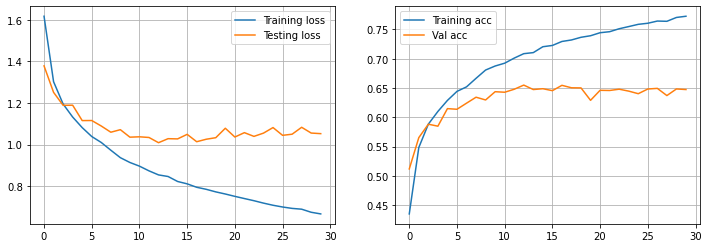

In [18]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [19]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.0525104999542236
Test accuracy: 0.6473000049591064


### Notes
Performance gained using the basic CNN is more than ~10% compared to the initial two layers MLP.